# Assignment

## Instructions

Complete the following exercise using Python.

Loan Approval Prediction:

Using the Loan Approval dataset, create an end-to-end workflow for predicting loan approval. Your workflow should include:

- Data loading and exploration
- Data preprocessing (handling missing values, encoding categorical variables, feature scaling)
- Feature selection
- Model training (using logistic regression and KNN)
- Model evaluation (using accuracy, precision, recall, F1-score and ROC AUC score)

In [293]:
# Essentials
import pandas as pd
import numpy as np

# Charting
import matplotlib.pyplot as plt
import seaborn as sns

# SciKit Learn Preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin

# Pipeline and column transformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Train test split
from sklearn.model_selection import train_test_split

# Grid Search
from sklearn.model_selection import GridSearchCV

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc


### Load Data

In [294]:

# Load the dataset
loan_data = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/refs/heads/master/Loan-Approval-Prediction.csv')

# Split features and target
X = loan_data.drop('Loan_Status', axis=1)
y = loan_data['Loan_Status']

In [295]:
X.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [296]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

## EDA

EDA with combining X and y

In [297]:
df = pd.concat([X, y], axis=1)

In [298]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [300]:
df.duplicated().sum()

0

In [301]:
df.Loan_ID.duplicated().sum()

0

In [302]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Imputation

In [303]:
df = df.drop(columns='Loan_ID')

In [304]:
df_cat = df.select_dtypes(include='object')
df_cat.apply(pd.unique)

Gender                 [Male, Female, nan]
Married                     [No, Yes, nan]
Dependents              [0, 1, 2, 3+, nan]
Education         [Graduate, Not Graduate]
Self_Employed               [No, Yes, nan]
Property_Area    [Urban, Rural, Semiurban]
Loan_Status                         [Y, N]
dtype: object

In [305]:
df_cat.apply(pd.Series.value_counts)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,NaN,NaN,345.0,NaN,NaN,NaN,NaN
1,NaN,NaN,102.0,NaN,NaN,NaN,NaN
2,NaN,NaN,101.0,NaN,NaN,NaN,NaN
3+,NaN,NaN,51.0,NaN,NaN,NaN,NaN
Female,112.0,NaN,NaN,NaN,NaN,NaN,NaN
Graduate,NaN,NaN,NaN,480.0,NaN,NaN,NaN
Male,489.0,NaN,NaN,NaN,NaN,NaN,NaN
N,NaN,NaN,NaN,NaN,NaN,NaN,192.0
No,NaN,213.0,NaN,NaN,500.0,NaN,NaN
Not Graduate,NaN,NaN,NaN,134.0,NaN,NaN,NaN


In [306]:
df_cat_imp_col = ['Gender', 'Married', 'Dependents', 'Self_Employed']
df[df_cat_imp_col]

,Gender,Married,Dependents,Self_Employed
0,Male,No,0,No
1,Male,Yes,1,No
2,Male,Yes,0,Yes
3,Male,Yes,0,No
4,Male,No,0,No
...,...,...,...,...
609,Female,No,0,No
610,Male,Yes,3+,No
611,Male,Yes,1,No
612,Male,Yes,2,No


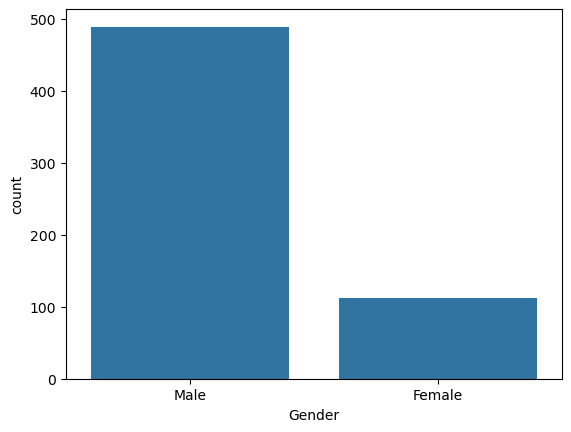

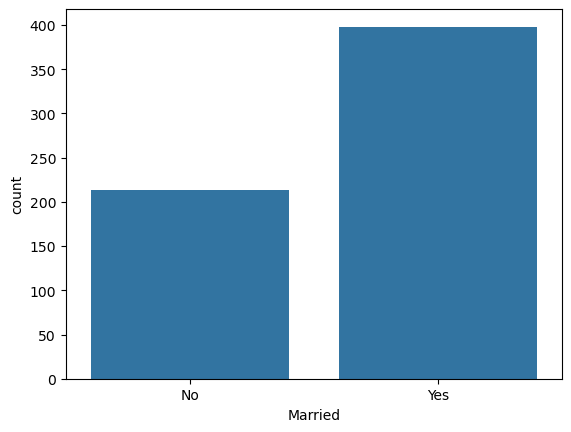

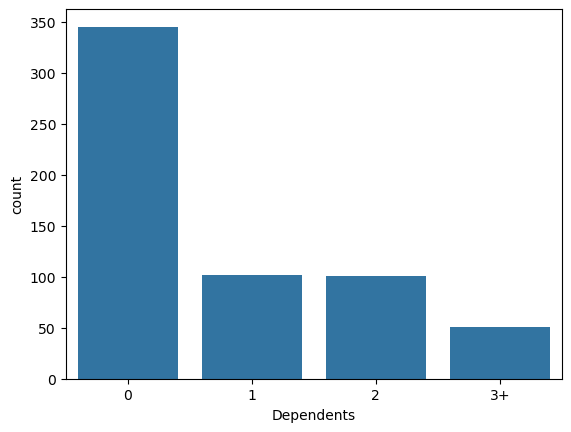

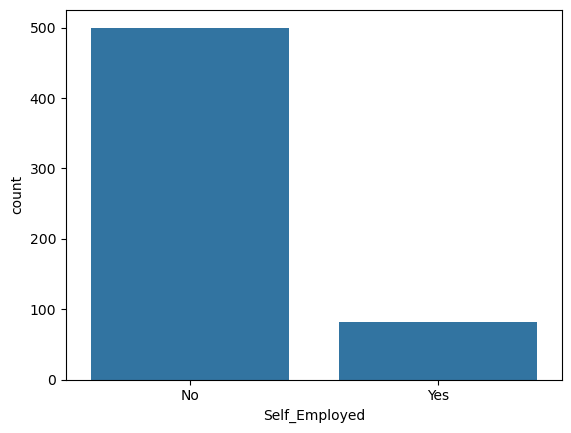

In [307]:
for each_col in df_cat_imp_col:
    sns.countplot(data=df, x=each_col)
    plt.show()

The distribution is almost one sided except for marriage status. Since marriage status only have 3 missing values. Will use most frequent categories as imputing strategy.

In [308]:
df_cat_imp_col = ['Gender', 'Married', 'Dependents', 'Self_Employed']
df[df_cat_imp_col]

,Gender,Married,Dependents,Self_Employed
0,Male,No,0,No
1,Male,Yes,1,No
2,Male,Yes,0,Yes
3,Male,Yes,0,No
4,Male,No,0,No
...,...,...,...,...
609,Female,No,0,No
610,Male,Yes,3+,No
611,Male,Yes,1,No
612,Male,Yes,2,No


In [309]:
imputor = SimpleImputer(strategy='most_frequent')
df[df_cat_imp_col] = imputor.fit_transform(df[df_cat_imp_col])
df[df_cat_imp_col].apply(pd.unique)

Gender           [Male, Female]
Married               [No, Yes]
Dependents        [0, 1, 2, 3+]
Self_Employed         [No, Yes]
dtype: object

In [310]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [311]:
df_num_imp_col = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

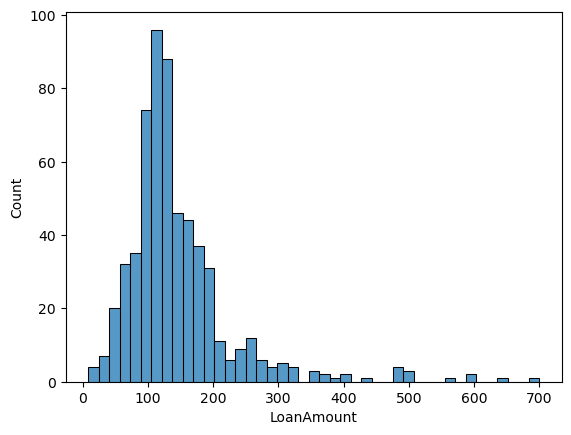

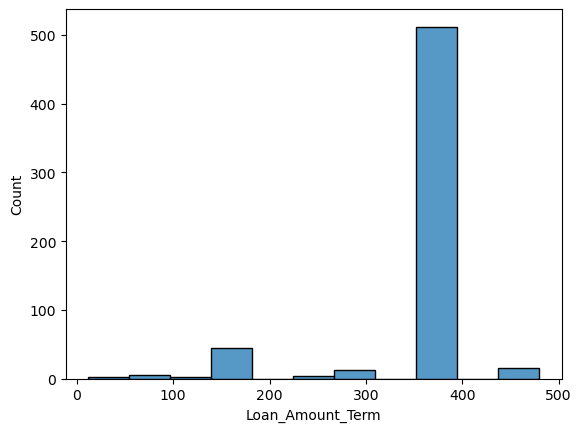

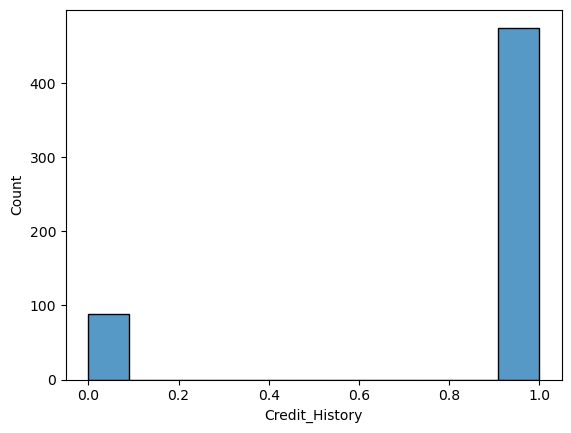

In [312]:
for each_col in df_num_imp_col:
    sns.histplot(data=df, x=each_col)
    plt.show()

In [313]:
df[df_num_imp_col].describe()

,LoanAmount,Loan_Amount_Term,Credit_History
count,592.000000,600.00000,564.000000
mean,146.412162,342.00000,0.842199
std,85.587325,65.12041,0.364878
min,9.000000,12.00000,0.000000
25%,100.000000,360.00000,1.000000
50%,128.000000,360.00000,1.000000
75%,168.000000,360.00000,1.000000
max,700.000000,480.00000,1.000000


In [314]:
df[df_num_imp_col].mode()

,LoanAmount,Loan_Amount_Term,Credit_History
0,120.0,360.0,1.0


Based on the distribution, the best imputing strategy is to use most frequent or mode.

In [315]:
imputor_num = SimpleImputer(strategy='mode')
df[df_num_imp_col] = imputor.fit_transform(df[df_num_imp_col])

In [316]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


### Univariate Analysis

In [318]:
df_cat_col = df.select_dtypes(include='object')
df_cat_col_names = df_cat_col.columns

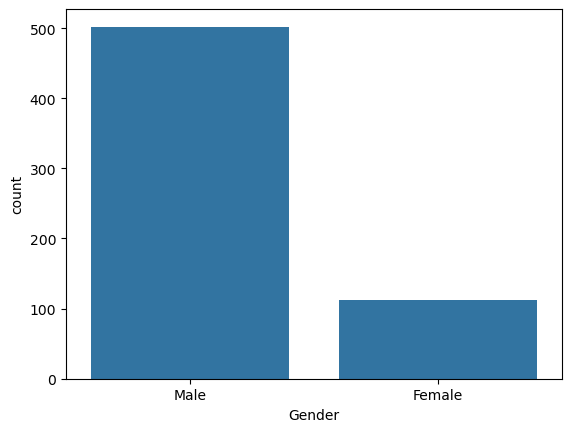

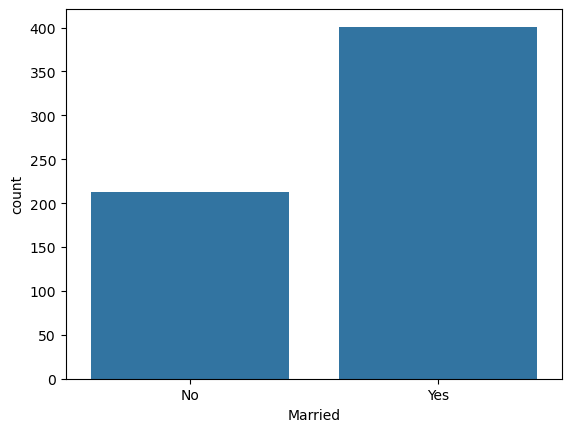

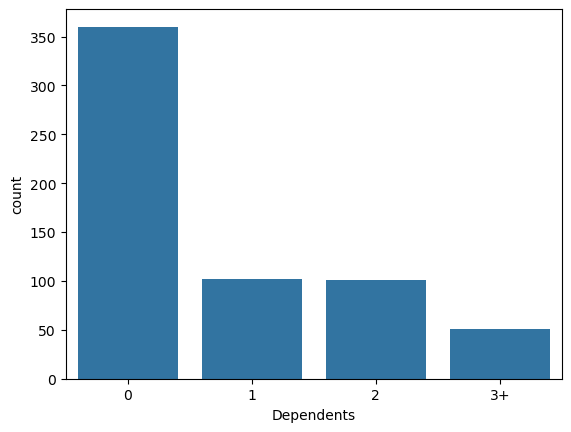

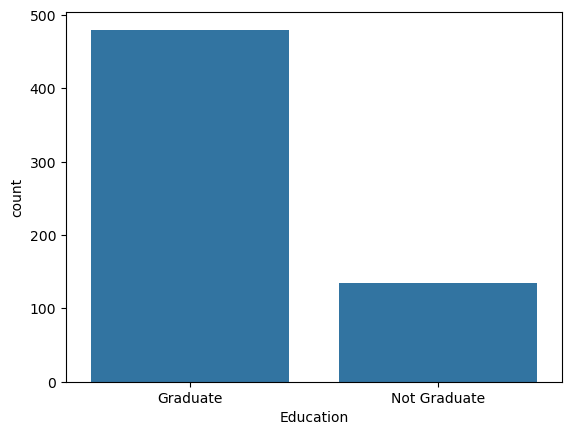

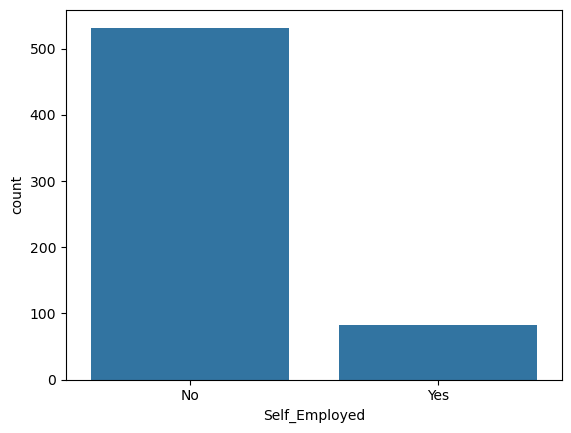

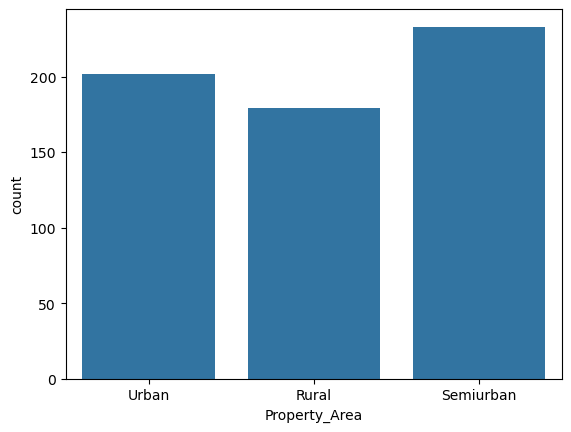

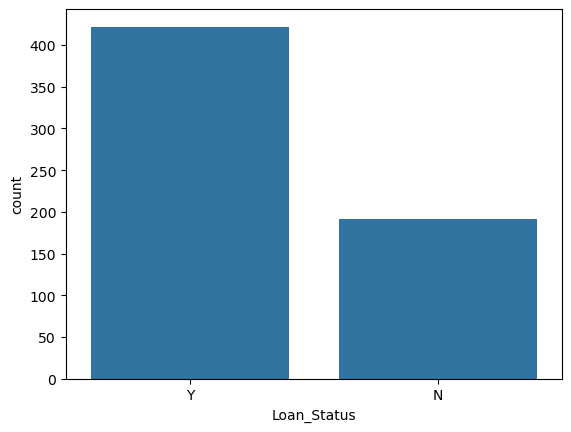

In [319]:
for each_col in df_cat_col_names:
    sns.countplot(data=df, x=each_col)
    plt.show()

Other than Property Area which is fairly evenly distributed. The rest of the categories are one heavily concentrated on one side.  

In [320]:
df_num_col = df.select_dtypes(include='number')
df_num_col_names = df_num_col.columns

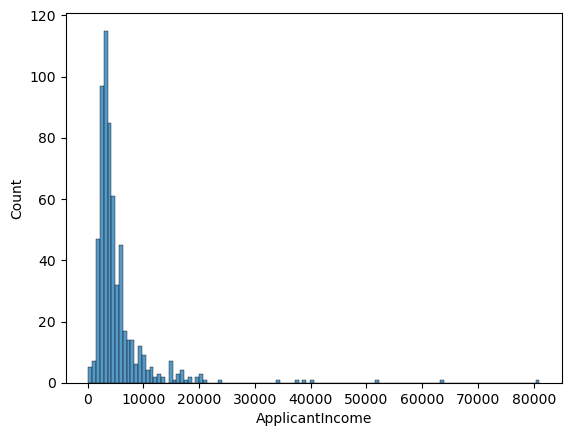

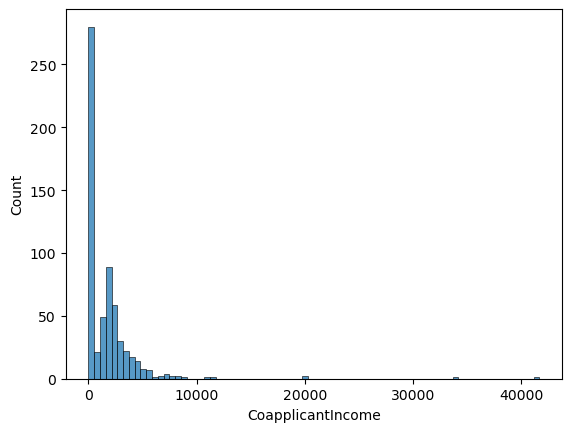

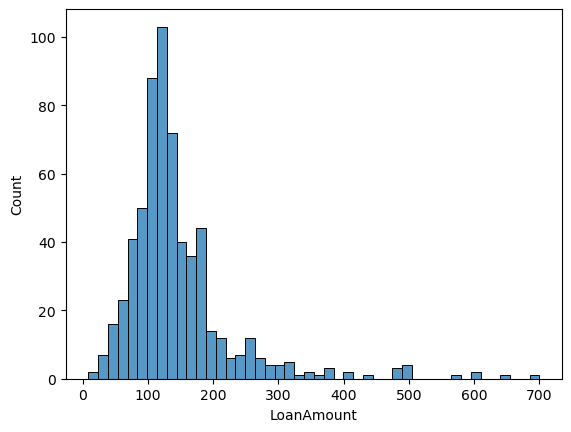

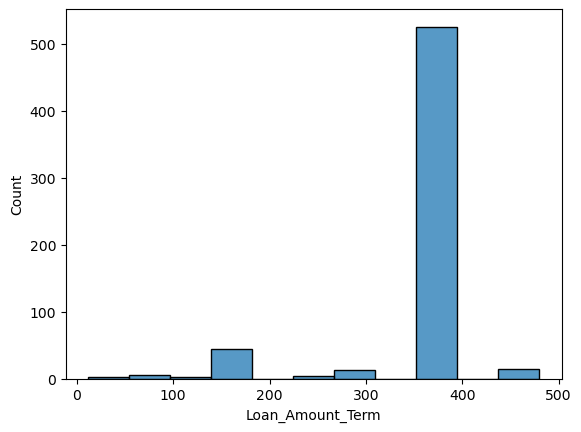

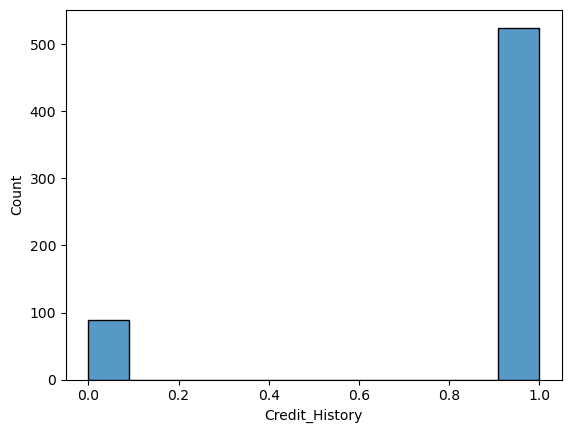

In [321]:
for each_col in df_num_col_names:
    sns.histplot(data=df, x=each_col)
    plt.show()

Both `Applicant Income` and `Co-applicant Income` is skewed to the right. This means that there are many outliers.

In [322]:
df.Credit_History.unique()

array([1., 0.])

`Credit_History`should be a category items.

### Bi-Variate Analysis

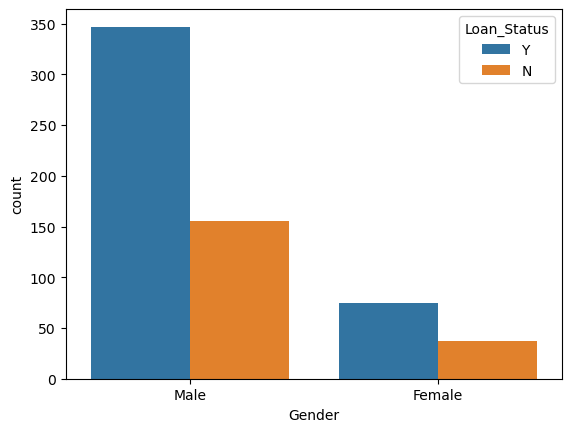

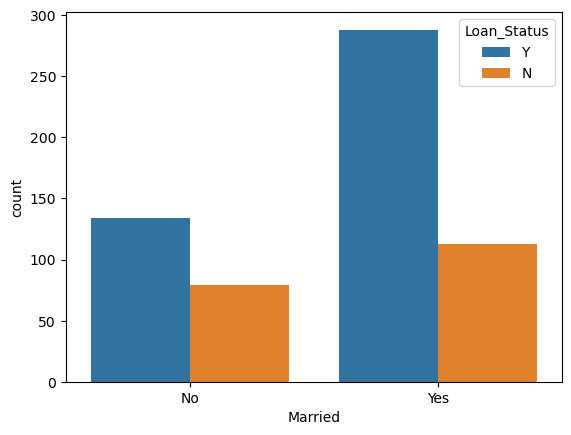

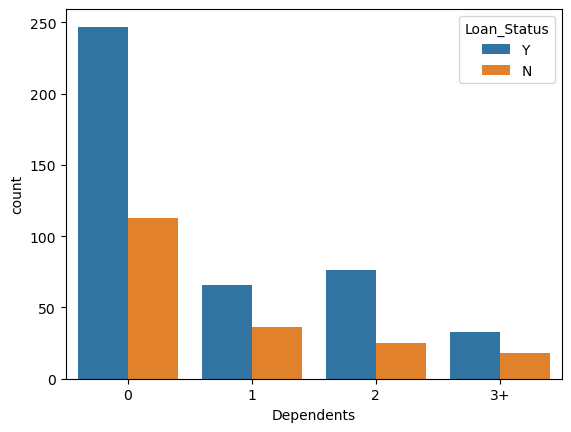

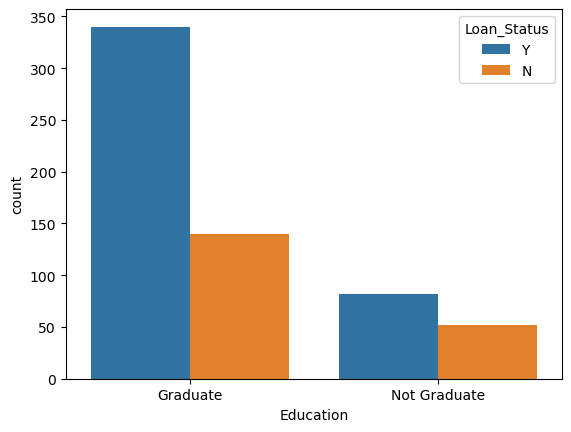

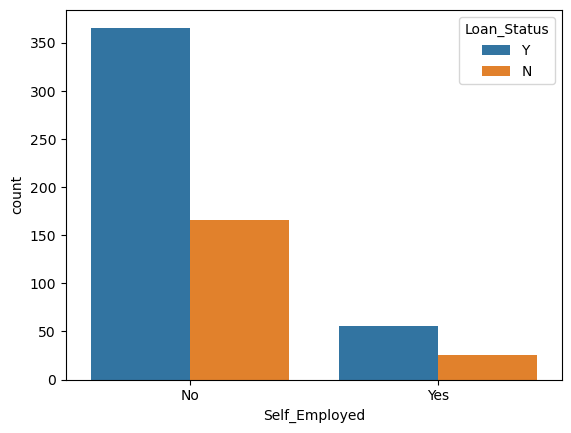

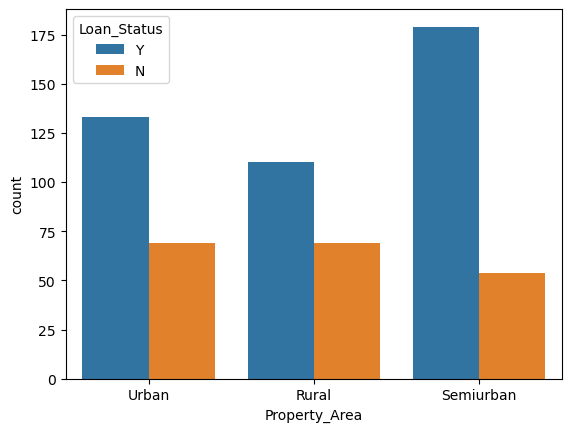

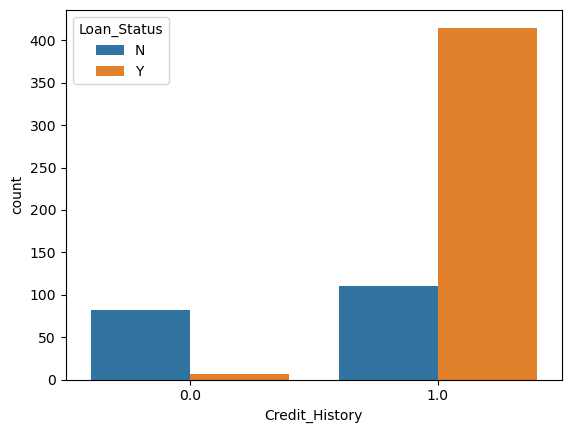

In [323]:
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']:
    sns.countplot(data=df, x=col, hue=df.Loan_Status)
    plt.show()

Cannot explain distribution since it is skewed.

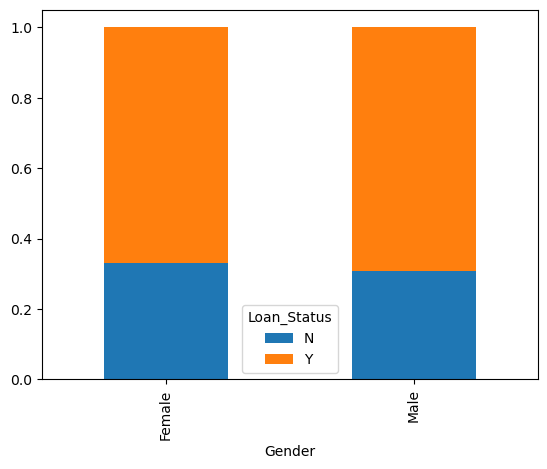

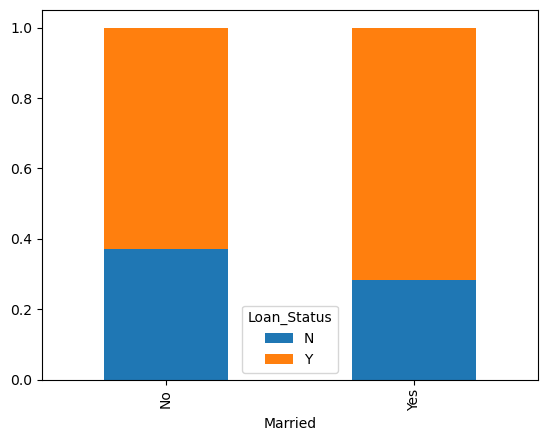

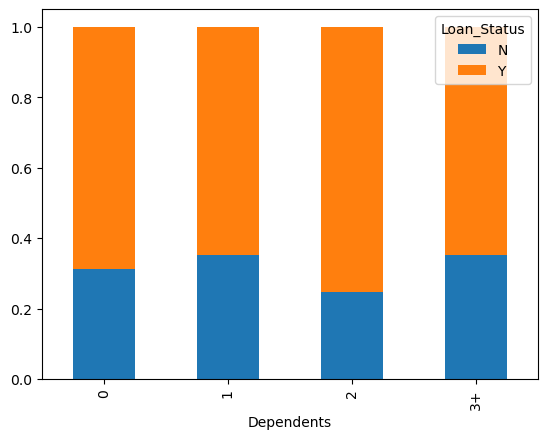

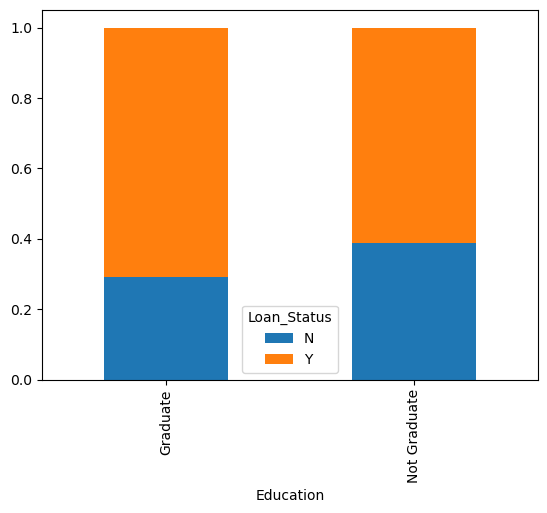

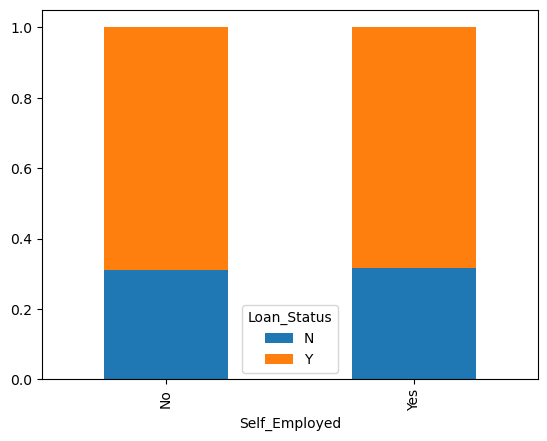

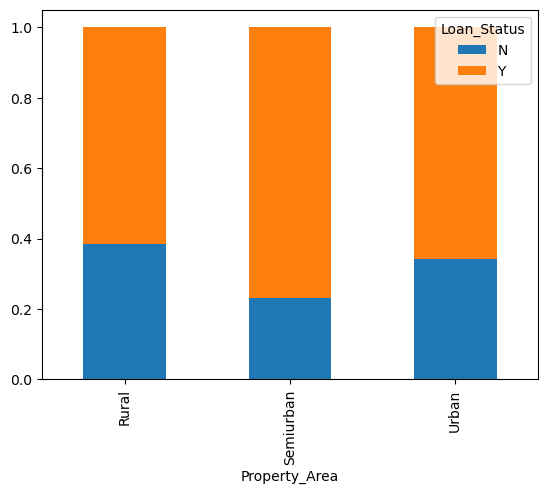

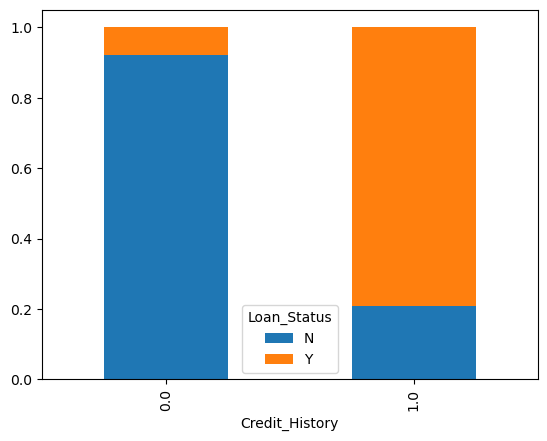

In [324]:
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']:
    pd.crosstab(df[col], df['Loan_Status'], normalize='index').plot(kind='bar', stacked=True)


Base on the normalized analysis, people who are married, graduate, live in semi-urban area with a credit history have a better chance of getting the loan approved. Self employed or sex do not influence the loan approval decision. Number of dependents varies with loan approval, however, family with 2 dependent tend to get their loan approved. 

In [325]:
df_num_col_names

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

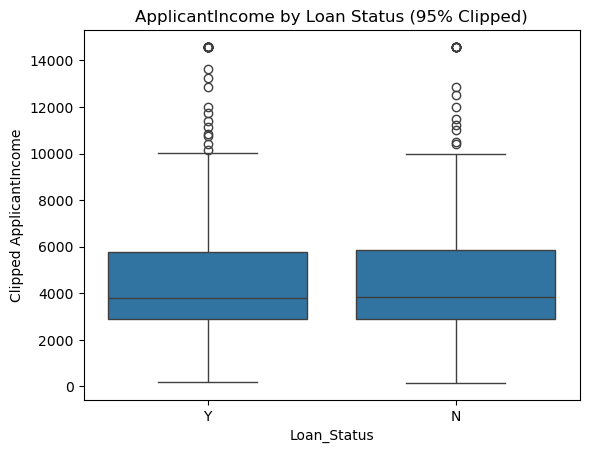

In [326]:
clipped_income = df['ApplicantIncome'].clip(upper=df['ApplicantIncome'].quantile(0.95))
sns.boxplot(data=df, x='Loan_Status', y=clipped_income)
plt.title("ApplicantIncome by Loan Status (95% Clipped)")
plt.ylabel("Clipped ApplicantIncome")
plt.show()


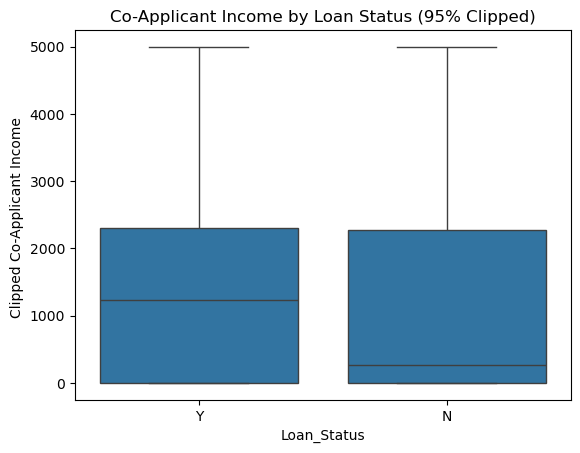

In [327]:
clipped_coincome = df['CoapplicantIncome'].clip(upper=df['CoapplicantIncome'].quantile(0.95))
sns.boxplot(data=df, x='Loan_Status', y=clipped_coincome)
plt.title("Co-Applicant Income by Loan Status (95% Clipped)")
plt.ylabel("Clipped Co-Applicant Income ")
plt.show()

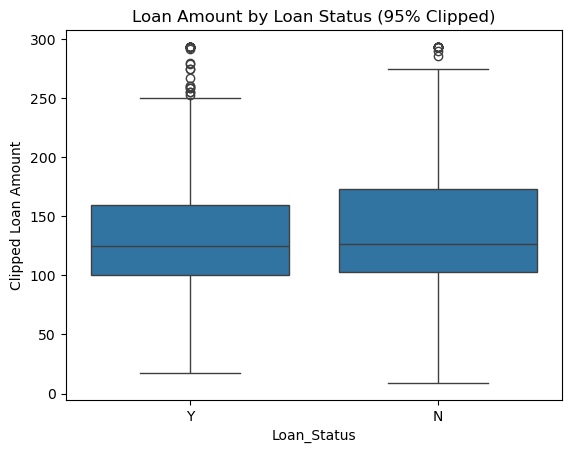

In [328]:
clipped_loanAmount = df['LoanAmount'].clip(upper=df['LoanAmount'].quantile(0.95))
sns.boxplot(data=df, x='Loan_Status', y=clipped_loanAmount)
plt.title("Loan Amount by Loan Status (95% Clipped)")
plt.ylabel("Clipped Loan Amount")
plt.show()

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

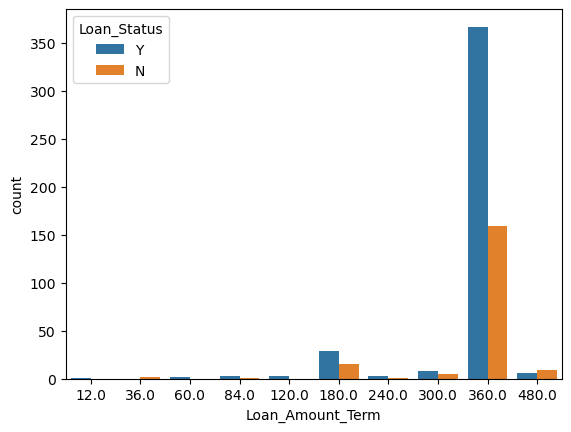

In [329]:
sns.countplot(data=df,x='Loan_Amount_Term', hue='Loan_Status')

Loan amount, loan amount term and applicant income do not have any influence in getting the loan approved, however, the income of co-applicant had some influence to the loan approval status. 

### Categorical Encoding

In [330]:
df_cat = df.select_dtypes(include='object')
df_cat.apply(pd.unique)

Gender                      [Male, Female]
Married                          [No, Yes]
Dependents                   [0, 1, 2, 3+]
Education         [Graduate, Not Graduate]
Self_Employed                    [No, Yes]
Property_Area    [Urban, Rural, Semiurban]
Loan_Status                         [Y, N]
dtype: object

Dependents can use ordinal encoding

In [331]:
df.Dependents

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [332]:
df.Dependents = df.Dependents.str.replace('3+', '3')
df.Dependents.unique()

array(['0', '1', '2', '3'], dtype=object)

In [333]:
ordinal_features = ['Dependents']

In [334]:
oe = OrdinalEncoder()
df[ordinal_features] = oe.fit_transform(df[ordinal_features])

In [335]:
df.Dependents

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
609    0.0
610    3.0
611    1.0
612    2.0
613    0.0
Name: Dependents, Length: 614, dtype: float64

In [336]:
df_cat = df.select_dtypes(include='object')
df_cat.apply(pd.unique)

Gender                      [Male, Female]
Married                          [No, Yes]
Education         [Graduate, Not Graduate]
Self_Employed                    [No, Yes]
Property_Area    [Urban, Rural, Semiurban]
Loan_Status                         [Y, N]
dtype: object

In [337]:
df = pd.get_dummies(df, drop_first=True)

In [338]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.0,5849,0.0,120.0,360.0,1.0,True,False,False,False,False,True,True
1,1.0,4583,1508.0,128.0,360.0,1.0,True,True,False,False,False,False,False
2,0.0,3000,0.0,66.0,360.0,1.0,True,True,False,True,False,True,True
3,0.0,2583,2358.0,120.0,360.0,1.0,True,True,True,False,False,True,True
4,0.0,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71.0,360.0,1.0,False,False,False,False,False,False,True
610,3.0,4106,0.0,40.0,180.0,1.0,True,True,False,False,False,False,True
611,1.0,8072,240.0,253.0,360.0,1.0,True,True,False,False,False,True,True
612,2.0,7583,0.0,187.0,360.0,1.0,True,True,False,False,False,True,True


In [339]:
df_cat = df.select_dtypes(include='bool')
df_cat

,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,True,False,False,False,False,True,True
1,True,True,False,False,False,False,False
2,True,True,False,True,False,True,True
3,True,True,True,False,False,True,True
4,True,False,False,False,False,True,True
...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,True
610,True,True,False,False,False,False,True
611,True,True,False,False,False,True,True
612,True,True,False,False,False,True,True


In [340]:
df_num = df.select_dtypes(include='number')
df_num.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.118202,0.030430,0.163017,-0.103864,-0.040160
ApplicantIncome,0.118202,1.000000,-0.116605,0.564698,-0.046531,-0.018615
CoapplicantIncome,0.030430,-0.116605,1.000000,0.189723,-0.059383,0.011134
LoanAmount,0.163017,0.564698,0.189723,1.000000,0.037152,-0.000250
Loan_Amount_Term,-0.103864,-0.046531,-0.059383,0.037152,1.000000,-0.004705
Credit_History,-0.040160,-0.018615,0.011134,-0.000250,-0.004705,1.000000


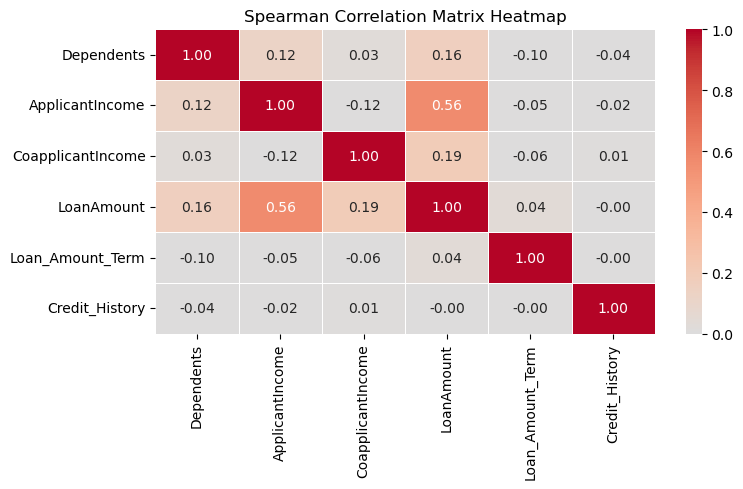

In [341]:
fig, ax = plt.subplots(figsize=(8,5))  

sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', vmin=0, center=0, vmax=1, linewidths=0.5, fmt=".2f")

ax.set_title('Spearman Correlation Matrix Heatmap')

plt.tight_layout()
plt.show()

The correlation chart above shows relationship between loan amount and co-applicant income and number of dependents.

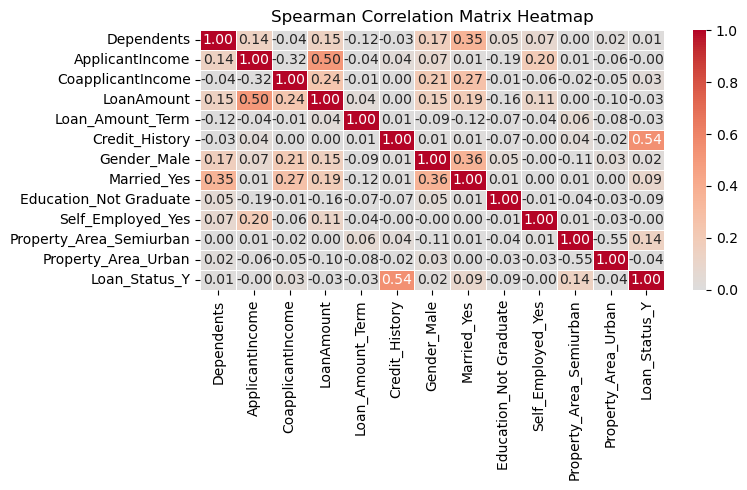

In [342]:
spearman_corr = df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(8,5))  

sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=0, center=0, vmax=1, linewidths=0.5, fmt=".2f")

ax.set_title('Spearman Correlation Matrix Heatmap')

plt.tight_layout()
plt.show()

The Spearman correlation matrix shows the high correlation on credit history with loan approval.

In [343]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,1.009623,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Feature Engineering

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    float64
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History           614 non-null    float64
 6   Gender_Male              614 non-null    bool   
 7   Married_Yes              614 non-null    bool   
 8   Education_Not Graduate   614 non-null    bool   
 9   Self_Employed_Yes        614 non-null    bool   
 10  Property_Area_Semiurban  614 non-null    bool   
 11  Property_Area_Urban      614 non-null    bool   
 12  Loan_Status_Y            614 non-null    bool   
dtypes: bool(7), float64(5), int64(1)
memory usage: 33.1 KB


In [345]:
df['total_income'] = df.ApplicantIncome + df.CoapplicantIncome

In [346]:
df.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)

In [347]:
df['income_loan_ratio'] = df.total_income / df.LoanAmount

In [348]:
df.head()

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,total_income,income_loan_ratio
0,0.0,120.0,360.0,1.0,True,False,False,False,False,True,True,5849.0,48.741667
1,1.0,128.0,360.0,1.0,True,True,False,False,False,False,False,6091.0,47.585938
2,0.0,66.0,360.0,1.0,True,True,False,True,False,True,True,3000.0,45.454545
3,0.0,120.0,360.0,1.0,True,True,True,False,False,True,True,4941.0,41.175000
4,0.0,141.0,360.0,1.0,True,False,False,False,False,True,True,6000.0,42.553191


In [349]:
dfx = df.drop(columns=['Loan_Status_Y'])
dfy = df['Loan_Status_Y'].astype('bool')

Combine applicant income with co-applicant income and also add income-loan ratio.

In [350]:
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.2, random_state=0)

In [351]:
model = LogisticRegression(max_iter=5000)

In [352]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

Test Accuracy: 0.8293
Precision: 0.8224
Recall: 0.9778
F1 Score: 0.8934
ROC AUC: 0.8138


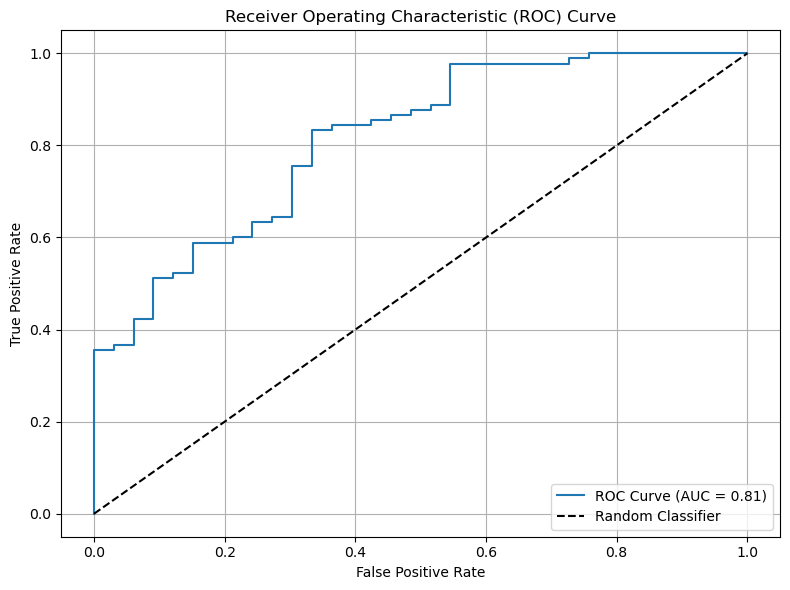

In [353]:
# ----------------------------
# Evaluate the model
# ----------------------------
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Initial baseline testing shows a recall of 97-98% and precision of 82-83%.

### Preprocessing Pipeline

In [354]:
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [355]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [356]:
y = y.map({'Y': 1, 'N': 0})

In [357]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [358]:
X.drop(columns='Loan_ID', inplace=True)

In [359]:
X.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [360]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=0)

In [361]:
# ----------------------------
# Column Groups
# ----------------------------
nominal_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
ordinal_cols = ['Dependents']
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income', 'Income_to_Loan_Ratio']


In [362]:
# ----------------------------
# Custom Feature Generator
# ----------------------------
class FeatureGenerator(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['Total_Income'] = X['ApplicantIncome'] + X['CoapplicantIncome']
        X['Income_to_Loan_Ratio'] = X['Total_Income'] / (X['LoanAmount'] + 1)
        return X

In [363]:
# ----------------------------
# Transformers
# ----------------------------

nominal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore'))
])

ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OrdinalEncoder())
])

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler())
])


In [364]:
# ----------------------------
# ColumnTransformer
# ----------------------------
preprocessor = ColumnTransformer(transformers=[
    ('nom', nominal_pipeline, nominal_cols),
    ('ord', ordinal_pipeline, ordinal_cols),
    ('num', numeric_pipeline, numerical_cols),
])

In [365]:
# ----------------------------
# Final Pipeline
# ----------------------------
logistic_pipeline = Pipeline(steps=[
    ('feature_gen', FeatureGenerator()),
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [366]:
logistic_pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_gen', FeatureGenerator()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area',
                                                   'Credit_History']),
                                                 ('ord',
                                                  Pipeline(steps=[(...
                                                                  ('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['Dependents']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Total_Income',
                                                   'Income_to_Loan_Ratio'])])),
                ('classifier', LogisticRegression())])

### Logistic Regression Model

Test Accuracy: 0.8033
Precision: 0.7885
Recall: 0.9762
F1 Score: 0.8723
ROC AUC: 0.8070


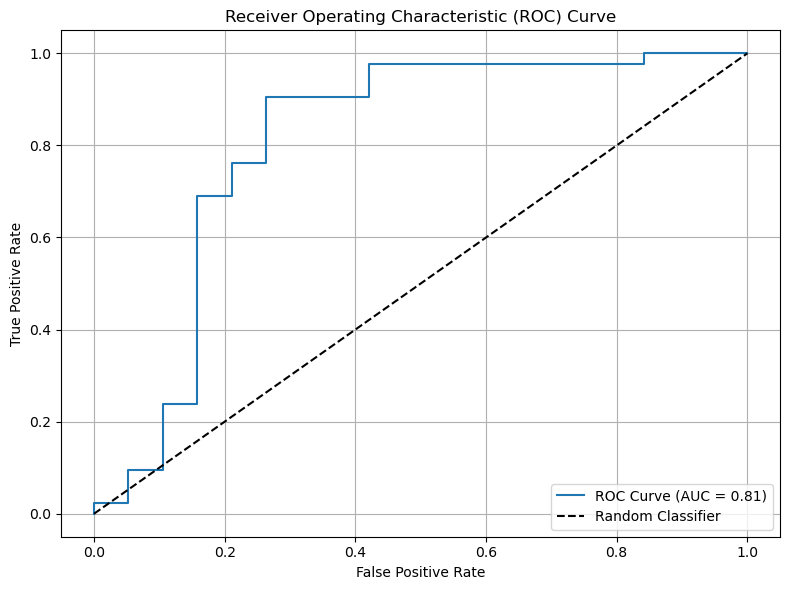

In [367]:
# ----------------------------
# Evaluate the model
# ----------------------------
y_pred = logistic_pipeline.predict(X_val)
y_proba = logistic_pipeline.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

fpr, tpr, thresholds = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [368]:
GS_result_lo_default = pd.DataFrame(data=[accuracy, precision, 
                               recall, f1, roc_auc], index=['Test Accuracy', 'Precision', 
                                                            'Recall', 'F1', 'ROC_AUC'], columns=['Logistic Regression Defaults'])
GS_result = GS_result_lo_default
GS_result

,Logistic Regression Defaults
Test Accuracy,0.803279
Precision,0.788462
Recall,0.976190
F1,0.872340
ROC_AUC,0.807018


With default pipeline,  we achieve a recall of 98% and precision of 79%

$$Precision = \frac{TP}{TP + FP}$$
$$Recall = \frac{TP}{TP + FN}$$
- TP = good loan
- FP = bad loan
- FN = missed good loan

Low Precision == High number of bad loan

Low Recall == High number of missed good loan

A precision of 79% means that we approved 21% of bad loans. The result shows that we missed very little good loans (2%), however 21% of our estimated good loans are no good. It fair slight worst in precision than our baseline model without any polynomial degree. Our objective is to maintain high recall and improve precision.

### KNN

In [369]:
# ----------------------------
# KNN Pipeline
# ----------------------------
knn_pipeline = Pipeline(steps=[
    ('feature_gen', FeatureGenerator()),
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [370]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_gen', FeatureGenerator()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area',
                                                   'Credit_History']),
                                                 ('ord',
                                                  Pipeline(steps=[(...
                                                                  ('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['Dependents']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Total_Income',
                                                   'Income_to_Loan_Ratio'])])),
                ('classifier', KNeighborsClassifier())])

Test Accuracy: 0.7869
Precision: 0.7736
Recall: 0.9762
F1 Score: 0.8632
ROC AUC: 0.7481


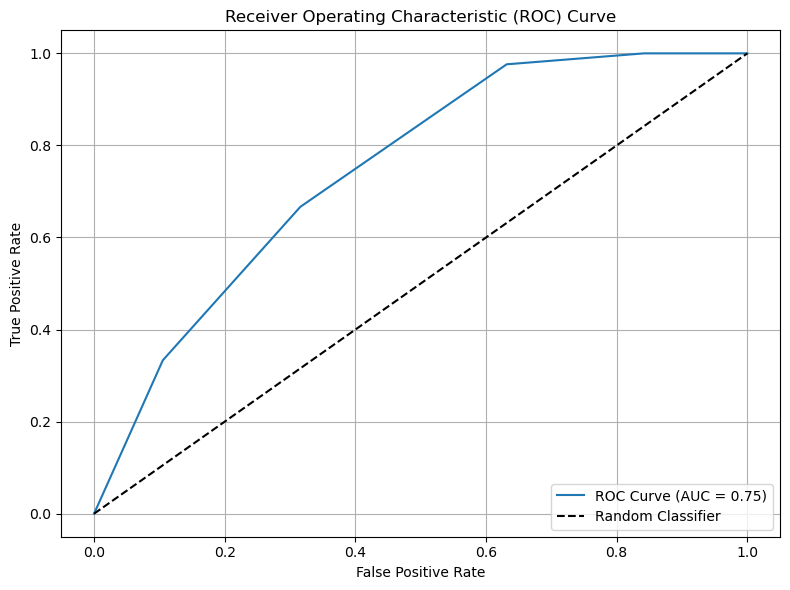

In [371]:
# ----------------------------
# Evaluate the model
# ----------------------------
y_pred = knn_pipeline.predict(X_val)
y_proba = knn_pipeline.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

fpr, tpr, thresholds = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [372]:
GS_result_knn_default = pd.DataFrame(data=[accuracy, precision, 
                               recall, f1, roc_auc], index=['Test Accuracy', 'Precision', 
                                                            'Recall', 'F1', 'ROC_AUC'], columns=['KNN Defaults'])
GS_result = pd.concat([GS_result, GS_result_knn_default], axis = 1)
GS_result

,Logistic Regression Defaults,KNN Defaults
Test Accuracy,0.803279,0.786885
Precision,0.788462,0.773585
Recall,0.976190,0.976190
F1,0.872340,0.863158
ROC_AUC,0.807018,0.748120


KNN defaults fair slightly worst than Logistic Regression in terms of precision, recall remains the same.

### Grid Search - Logistic Regression

In grid search we will use precision as scoring criteria, since recall is already quite high. 

In [373]:
# parameter search grid
lo_param_grid = {
    'preprocessor__num__poly__degree': [3, 4, 5], 
    'classifier__max_iter': [2000],
    'classifier__C': [1100, 1200, 1300, 1400],
}

In [374]:
# Run grid search - may take a while
lo_grid_search = GridSearchCV(logistic_pipeline, lo_param_grid, cv=5, scoring='precision', n_jobs=-1)
lo_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('feature_gen', FeatureGenerator()),
                                       ('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Education',
                                                                          'Self_Employed',
                                                                          'Property_Area',
                                                                          'Credit_History...
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term',
                                                                          'Total_Income',
                                                                          'Income_to_Loan_Ratio'])])),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier__C': [1100, 1200, 1300, 1400],
                         'classifier__max_iter': [2000],
                         'preprocessor__num__poly__degree': [3, 4, 5]},
             scoring='precision')

In [375]:
lo_grid_search.best_params_

{'classifier__C': 1300,
 'classifier__max_iter': 2000,
 'preprocessor__num__poly__degree': 4}

Test Accuracy: 0.8065
Precision: 0.8462
Recall: 0.9167
F1 Score: 0.8800
ROC AUC: 0.7054


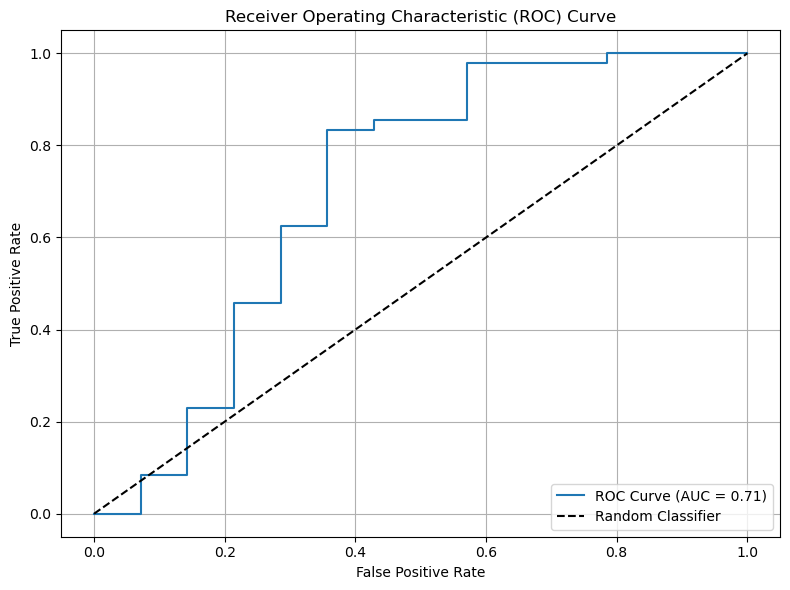

In [376]:
# ----------------------------
# Evaluate the model
# ----------------------------
y_pred = lo_grid_search.predict(X_test)
y_proba = lo_grid_search.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [377]:
GS_result_lo = pd.DataFrame(data=[accuracy, precision, 
                               recall, f1, roc_auc], index=['Test Accuracy', 'Precision', 
                                                            'Recall', 'F1', 'ROC_AUC'], columns=['Tuned Logistics'])
GS_result = pd.concat([GS_result, GS_result_lo], axis = 1)
GS_result

,Logistic Regression Defaults,KNN Defaults,Tuned Logistics
Test Accuracy,0.803279,0.786885,0.806452
Precision,0.788462,0.773585,0.846154
Recall,0.976190,0.976190,0.916667
F1,0.872340,0.863158,0.880000
ROC_AUC,0.807018,0.748120,0.705357


Since precision is the lowest in the metric, we use precision as the scoring parameters. Precision score improved while recall reduce to 91% which is acceptable.

### Grid Search - KNN

In [378]:
# parameter search grid
knn_param_grid = {
    'preprocessor__num__poly__degree': [2, 3, 4],
    'classifier__n_neighbors': [2, 3, 4, 5, 7, 10, 12, 15],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [379]:
# Run Grid Search - May take a while
knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=5, scoring='precision', n_jobs=-1)
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('feature_gen', FeatureGenerator()),
                                       ('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Education',
                                                                          'Self_Employed',
                                                                          'Property_Area',
                                                                          'Credit_History...
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term',
                                                                          'Total_Income',
                                                                          'Income_to_Loan_Ratio'])])),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__algorithm': ['auto', 'ball_tree',
                                                   'kd_tree', 'brute'],
                         'classifier__n_neighbors': [2, 3, 4, 5, 7, 10, 12, 15],
                         'classifier__weights': ['uniform', 'distance'],
                         'preprocessor__num__poly__degree': [2, 3, 4]},
             scoring='precision')

In [380]:
knn_grid_search.best_params_

{'classifier__algorithm': 'auto',
 'classifier__n_neighbors': 2,
 'classifier__weights': 'uniform',
 'preprocessor__num__poly__degree': 2}

Test Accuracy: 0.7049
Precision: 0.8529
Recall: 0.6905
F1 Score: 0.7632
ROC AUC: 0.7788


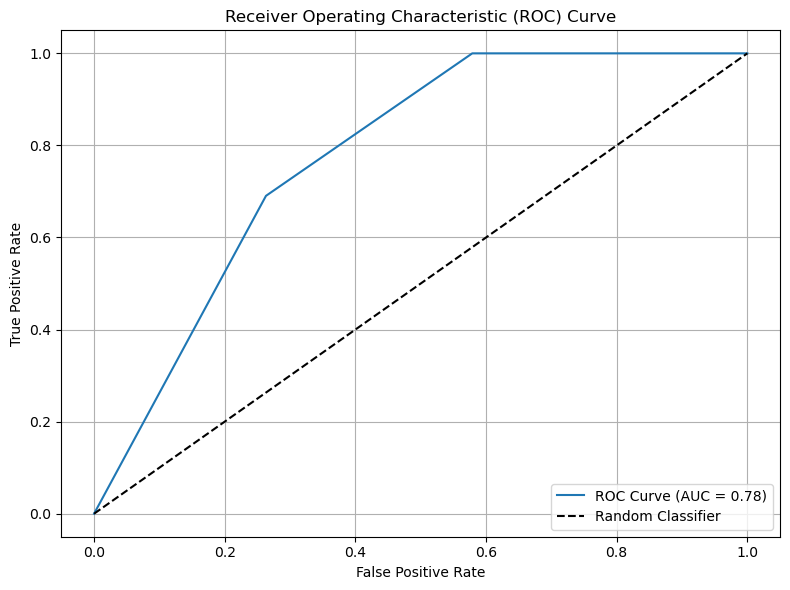

In [381]:
# ----------------------------
# Evaluate the model
# ----------------------------
y_pred = knn_grid_search.predict(X_val)
y_proba = knn_grid_search.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

fpr, tpr, thresholds = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [382]:
GS_result_knn = pd.DataFrame(data=[accuracy, precision, 
                               recall, f1, roc_auc], index=['Test Accuracy', 'Precision', 
                                                            'Recall', 'F1', 'ROC_AUC'], columns=['KNN Tuned'])
GS_result = pd.concat([GS_result, GS_result_knn], axis=1)
GS_result

,Logistic Regression Defaults,KNN Defaults,Tuned Logistics,KNN Tuned
Test Accuracy,0.803279,0.786885,0.806452,0.704918
Precision,0.788462,0.773585,0.846154,0.852941
Recall,0.976190,0.976190,0.916667,0.690476
F1,0.872340,0.863158,0.880000,0.763158
ROC_AUC,0.807018,0.748120,0.705357,0.778822


In KNN grid search, if we use precisions as scoring criteria, precision score slightly better but recall drops to 79%. This is a too big scarifies of 20% in order to gain 1% increase in precision. Base on the grid search result, the best model will be Logistic Regression.

### Final Application of Best Models

In [383]:
# Best model from Ridge regression (Grid Search)
best_model = lo_grid_search.best_estimator_
lo_grid_search.best_params_

{'classifier__C': 1300,
 'classifier__max_iter': 2000,
 'preprocessor__num__poly__degree': 4}

Test Accuracy: 0.8065
Precision: 0.8462
Recall: 0.9167
F1 Score: 0.8800
ROC AUC: 0.7054


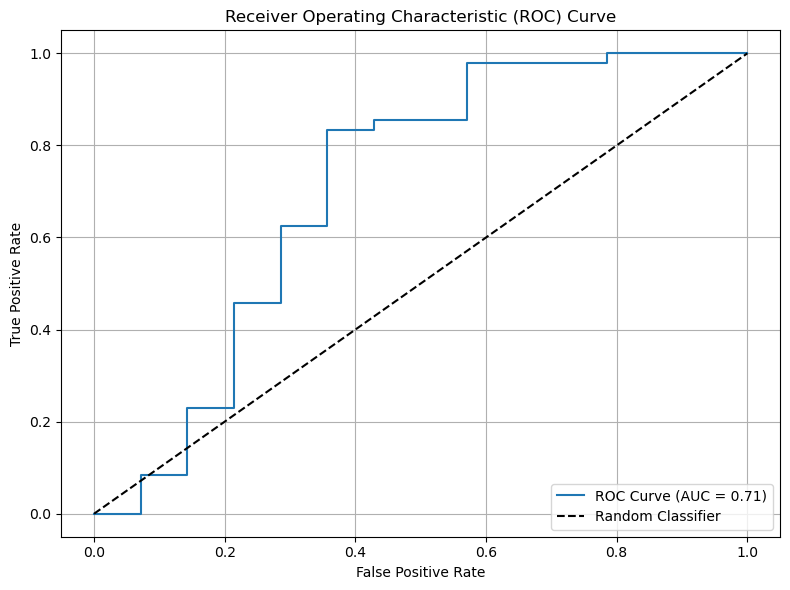

In [384]:
# ----------------------------
# Evaluate the model
# ----------------------------
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusion

**Test result produce the same performance as the validation dataset. This confirms that validation set and test set has the same representation. However, we need to explore more features in order to improve precision if 85% is not good enough.**

## End